# read library

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Linear regression

## Make data

In [2]:
N=30
X=2*np.random.rand(N,1)
y=4+3*X+np.random.randn(N,1)

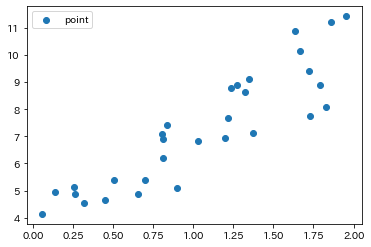

In [3]:
plt.figure(facecolor='white')
plt.scatter(X,y,label='point')
plt.legend()

## modeling

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() # インスタンス化
model.fit(X,y) # 学習を実行
model.intercept_[0],model.coef_[0][0] # 切片(intercept),傾き(coef)を表示

(3.7313984096912964, 3.361227732955476)

In [5]:
print(model.get_params()) # get parameters for this estimator
print(model.score(X,y)) # Return the coefficient of determination R^2 of the prediction(予測の決定係数R^2を返す)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
0.8068592141020723


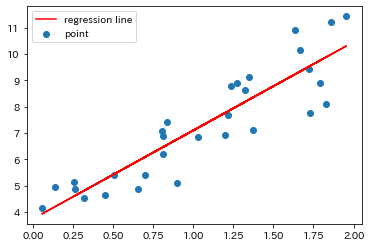

In [6]:
plt.figure(facecolor='white')
plt.scatter(X,y,label='point')
plt.plot(X,model.predict(X),'r-',label='regression line')
plt.legend()

# Polynomial regression

## make data

In [7]:
N=30
X = 6*np.random.rand(N,1)-3 #ranedom.rand(m,n)   m*n行列で0以上1未満の乱数を生成する
y=0.5*X**2+X+2+np.random.randn(N,1) #random.randn(m,n)   m*n行列で平均0,分散0の乱数を生成する

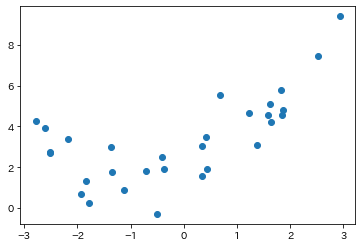

In [8]:
plt.figure(facecolor='white')
plt.scatter(X,y)

## modeling

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly[0] # [a,a^2]になっていることを確認

array([1.84144871, 3.39093334])

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_poly,y)
model.intercept_,model.coef_

(array([1.96016769]), array([[0.91616444, 0.51860899]]))

In [11]:
print(model.get_params()) # get parameters for this estimator
print(model.score(X_poly,y)) # Return the coefficient of determination R^2 of the prediction(予測の決定係数R^2を返す)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
0.7824510102942716


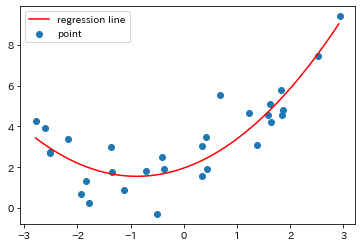

In [15]:
point = np.arange(X.min(),X.max(),0.05).reshape(-1,1) # arangeを生成
point_poly = poly_features.fit_transform(point)
predict = model.predict(point_poly)

plt.figure(facecolor='white')
plt.scatter(X,y,label='point')
plt.plot(point,predict,color='red',label='regression line')
plt.legend()